In [289]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)

from skimage import filters, morphology, segmentation, measure
from skimage.util import compare_images
from skimage.io import imread, imsave
import scipy.ndimage as ndi

import h5py   # HDF5 data file management library
from glob import glob

In [283]:
def plot_comparison(input_img, output_img, cmap = ['gray', 'inferno'],
                    labels=['input_data', 'output_data', 'merge']):
  title_size = 20
  fig, axes = plt.subplots(1, 3, figsize=(5*3, 5))
  for ax, img, c, title in zip(axes[:2], [input_img, output_img], cmap, labels[:2]):
    ax.set_title(title, size=title_size)
    ax.imshow(img, cmap=c)
    ax.axis('off')


  axes[2].set_title('Merge', size=title_size)
  #axes[2].imshow(merge)
  axes[2].imshow(input_img, cmap=cmap[0])
  axes[2].imshow(output_img, cmap=cmap[1], alpha=0.3)

  axes[2].set(xticks=[], yticks=[])
  axes[2].axis('off')
  
  plt.subplots_adjust(wspace=0.05)
  return axes

In [367]:
def prepareProc(img, threshold=150):
  ymax, xmax = img.shape
  img2 = img > threshold
  if np.unique(img2).shape[0]==2: #True when there are pixels above the threshold
    # double dilation to increase minimal spot size
    labels = ndi.label(img>0)[0]
    labels = segmentation.clear_border(labels)
    rp = measure.regionprops(labels)
    centroids = np.array([region.centroid for region in rp]).round().astype(int)
    img2 = np.zeros_like(img2)
    img2[centroids[:, 0], centroids[:, 1]] = True
    img2 = filters.gaussian(img2, 3)
  return img2

In [7]:
data_path = 'Y:/Model/'  # nb: begin with /

#Inputs
#Mito
input_data_filename = data_path + 'Mito.h5' 
input_data = np.array(h5py.File(input_data_filename, 'r').get('Mito'))/imax
print('Inputs'+':', input_data.shape)

#Outputs
output_data_filename = data_path + 'Proc.h5'
output_data = np.array(h5py.File(output_data_filename, 'r').get('Proc'))
print('Outputs:', output_data.shape)

Inputs: (37000, 128, 128)
Outputs: (37000, 128, 128)


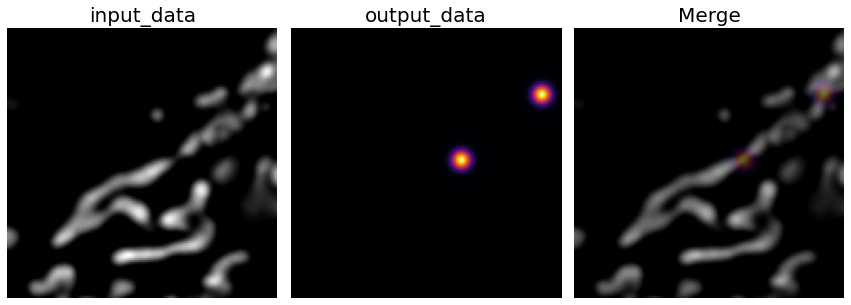

In [376]:
frame = 500
plot_comparison(input_data[frame], prepareProc(output_data[frame], threshold=0))
plt.show()

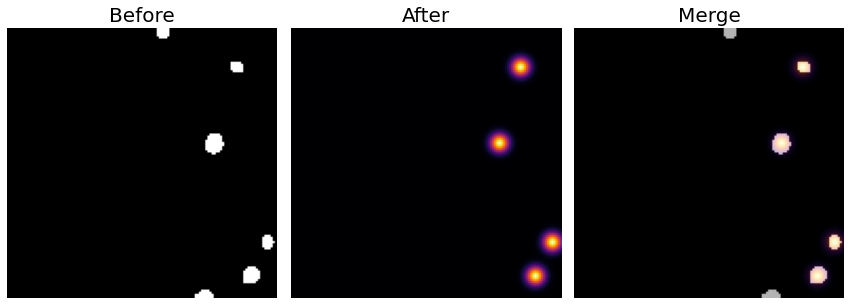

In [377]:
img = output_data[10]
plot_comparison(img>0, prepareProc(img, threshold=0), labels=['Before', 'After'])
plt.show()